In [1]:
import zipfile
import os

zip_path = 'archive.zip'         
target_file = 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files inside the zip (good for checking)
    print("Files inside the zip:")
    zip_ref.printdir()
    
    # Extract ONLY the one file you want to current directory
    if target_file in zip_ref.namelist():
        zip_ref.extract(target_file, path='.')   # '.' = current directory
        print(f"\nExtracted: {target_file}")
    else:
        print(f"\nFile '{target_file}' not found in zip. Check the list above.")

# Verify it's there now
print("\nCurrent directory after extraction:")
!ls -lh | grep diabetes

Files inside the zip:
File Name                                             Modified             Size
diabetes_012_health_indicators_BRFSS2015.csv   2021-11-08 16:49:06     22738151
diabetes_binary_5050split_health_indicators_BRFSS2015.csv 2021-11-08 16:49:06      6347570
diabetes_binary_health_indicators_BRFSS2015.csv 2021-11-08 16:49:06     22738154

Extracted: diabetes_binary_5050split_health_indicators_BRFSS2015.csv

Current directory after extraction:
-rw-r--r-- 1 eyobunix eyobunix 6.1M Feb 20 12:40 diabetes_binary_5050split_health_indicators_BRFSS2015.csv
-rw-r--r-- 1 eyobunix eyobunix 1.5K Feb 20 12:39 diabetes_ml_model.ipynb


## Section 1: Introduction and Data Exploration
**Objective**: This section provides an overview of the Diabetes Health Indicators dataset and performs Exploratory Data Analysis (EDA) to understand the relationships between lifestyle factors and diabetes.

**Significance**: Predicting diabetes is a critical task in public health. Early detection through indicators like BMI, Blood Pressure, and Diet allows for preventative lifestyle changes, reducing the long-term strain on healthcare systems and improving patient longevity


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
# the CSV file is in the same folder as our notebook
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Basic check
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth              70692 no

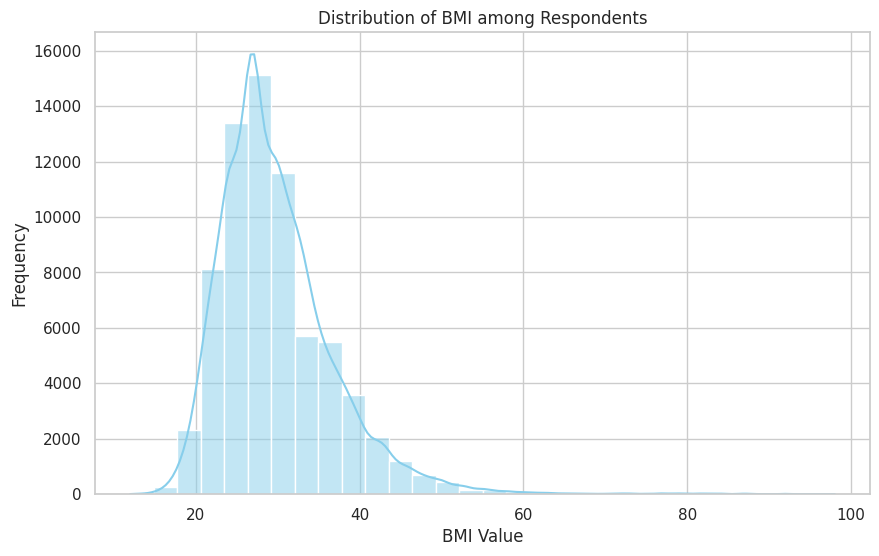

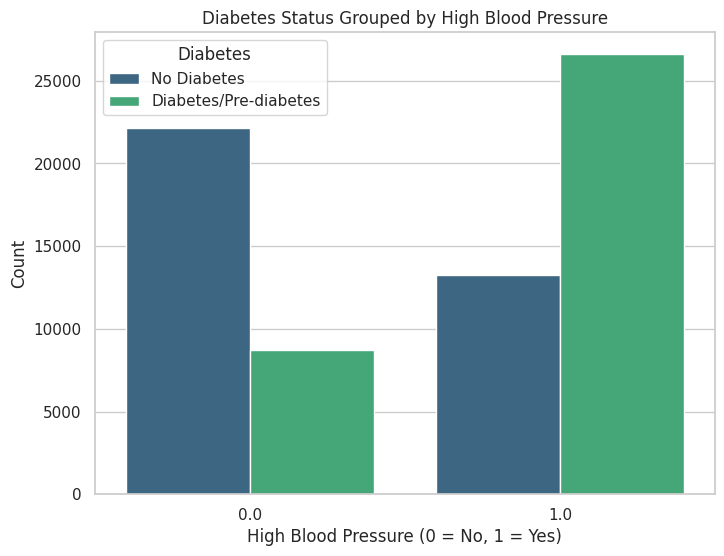

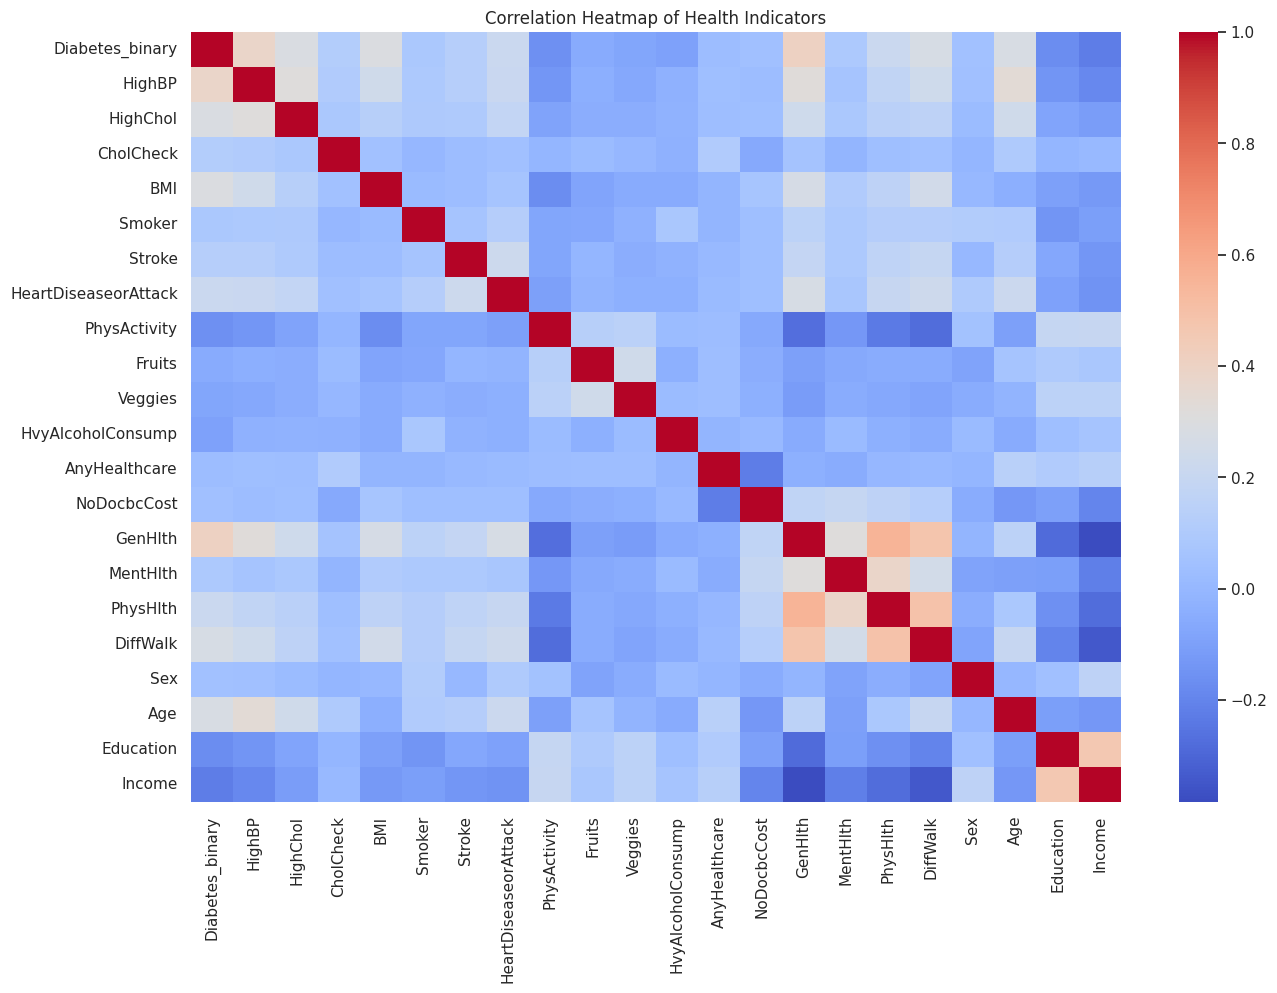

In [7]:
# Set the visual style for all plots
sns.set_theme(style="whitegrid")

# --- Univariate Analysis ---
# We want to see the distribution of BMI in our dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BMI among Respondents')
plt.xlabel('BMI Value')
plt.ylabel('Frequency')
plt.show()

# --- Bivariate Analysis ---
# We want to see how High Blood Pressure relates to Diabetes status
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', hue='Diabetes_binary', data=df, palette='viridis')
plt.title('Diabetes Status Grouped by High Blood Pressure')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes/Pre-diabetes'])
plt.show()

# --- Correlation Analysis ---
# Checking how all features relate to each other to identify patterns
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Health Indicators')
plt.show()

## Section 2: Data Cleaning and Pre-processing
**Objective**: To ensure the integrity of the data by checking for missing values and outliers. Since the dataset is pre-encoded, we focus on auditing the quality rather than manual transformation.

**Handling Outliers**: Our analysis of the BMI distribution shows a "long tail" (values above 60). While these are technically outliers, in a health context, these represent real patients with extreme obesity. We choose to keep them to ensure our model can predict diabetes across all body types.

Missing Values per Column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


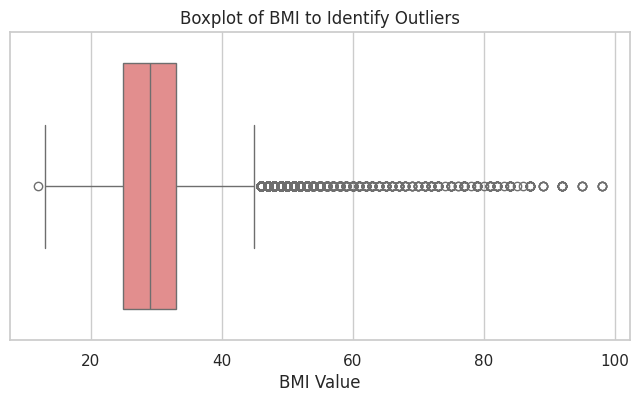

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
# Check for missing values in all columns
print("Missing Values per Column:")
print(df.isnull().sum())

# Visualizing outliers using a Boxplot for BMI
# Boxplots are the standard professional way to show outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['BMI'], color='lightcoral')
plt.title('Boxplot of BMI to Identify Outliers')
plt.xlabel('BMI Value')
plt.show()

# Descriptive statistics to understand the scale of our 21 features
# This helps us decide if we need to 'scale' the data later
df.describe()